<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Transfer to array
train = df.values

In [4]:
# Train, test split
train, test = train_test_split(train, train_size=0.90, test_size=0.10, random_state=42)
print(train.shape, test.shape)

(455, 14) (51, 14)


In [5]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(train[:,0:13])
Y = train[:,13]
X_test = scaler.fit_transform(test[:,0:13])
Y_test = test[:,13]

In [6]:
# Create model
model = Sequential()
    
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

W0204 16:56:32.796358 4708564416 deprecation.py:506] From /Users/JKMacBook/opt/anaconda3/envs/NN/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# Fit the data and record the history
history = model.fit(
                    X,
                    Y,
                    epochs=100
)

Epoch 1/100
455/455 [==============================] - 0s 702us/sample - loss: 565.8196
Epoch 2/100
455/455 [==============================] - 0s 82us/sample - loss: 458.1558
Epoch 3/100
455/455 [==============================] - 0s 76us/sample - loss: 248.5469
Epoch 4/100
455/455 [==============================] - 0s 92us/sample - loss: 79.6608
Epoch 5/100
455/455 [==============================] - 0s 234us/sample - loss: 51.3742
Epoch 6/100
455/455 [==============================] - 0s 291us/sample - loss: 34.5712
Epoch 7/100
455/455 [==============================] - 0s 208us/sample - loss: 27.4973
Epoch 8/100
455/455 [==============================] - 0s 111us/sample - loss: 24.4674
Epoch 9/100
455/455 [==============================] - 0s 79us/sample - loss: 21.4877
Epoch 10/100
455/455 [==============================] - 0s 74us/sample - loss: 20.1227
Epoch 11/100
455/455 [==============================] - 0s 74us/sample - loss: 18.6678
Epoch 12/100
455/455 [======================

455/455 [==============================] - 0s 92us/sample - loss: 4.1971
Epoch 96/100
455/455 [==============================] - 0s 86us/sample - loss: 4.2017
Epoch 97/100
455/455 [==============================] - 0s 91us/sample - loss: 4.0448
Epoch 98/100
455/455 [==============================] - 0s 97us/sample - loss: 3.9412
Epoch 99/100
455/455 [==============================] - 0s 85us/sample - loss: 4.0255
Epoch 100/100
455/455 [==============================] - 0s 77us/sample - loss: 4.2377


In [8]:
# Retrieve the score (loss = MSE at compile time)
scores = model.evaluate(X_test, Y_test)

51/51 [==============================] - 0s 1ms/sample - loss: 16.1365


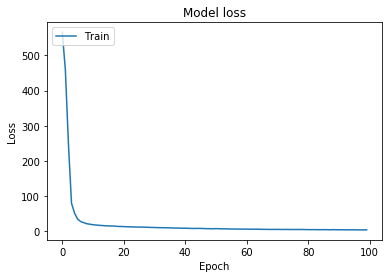

In [9]:
# Plot the loss-MSE value
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [10]:
# Run the data in a linear regression model
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Encode and fit a linear regression model
train, test = train_test_split(df, train_size=0.90, test_size=0.10, random_state=42)
print(train.shape, test.shape)

target = 'medv'
X_train = train.drop(target, axis=1).values
y_train = train[[target]].values
X_test = test.drop(target, axis=1).values
y_test = test[[target]].values

pipeline = make_pipeline(
  SimpleImputer(strategy='mean'),
  LinearRegression()
)

pipeline.fit(X_train, y_train)

ty_pred = pipeline.predict(X_test)

# Print regression metrics for test
test_mse = mean_squared_error(y_test, ty_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, ty_pred)
test_r2 = r2_score(y_test, ty_pred)
print('Test Mean Squared Error:', test_mse)
print('Test Mean Absolute Error:', test_mae)
print('Test R^2:', test_r2)

(455, 14) (51, 14)
Test Mean Squared Error: 14.99585287658263
Test Mean Absolute Error: 2.8342104578589704
Test R^2: 0.7598135533532476


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [11]:
# Load the data
from tensorflow.keras.datasets import fashion_mnist
((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()

In [12]:
# Hyper Parameters
batch_size = 64
num_classes = 10
epochs = 20

# Reshape the data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# X Variable Types
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
mnist_model = Sequential()

# Input => Hidden
mnist_model.add(Dense(16, input_dim=784, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Output
mnist_model.add(Dense(10,activation='softmax'))

#Compile
mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

mnist_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total params: 13,546
Trainable params: 13,546
Non-trainable params: 0
_________________________________________________________________


In [14]:
def neural_network(X):
    
    dense1 = Dense(8, activation='relu', input=X)
    dense2 = Dense(8, activation='relu')(X)
    
    
    return dense2 #or return model

In [15]:
history = mnist_model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=False)
scores = mnist_model.evaluate(X_test, y_test)
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 1s 56us/sample - loss: 0.6289 - acc: 0.7682
acc: 76.81999802589417


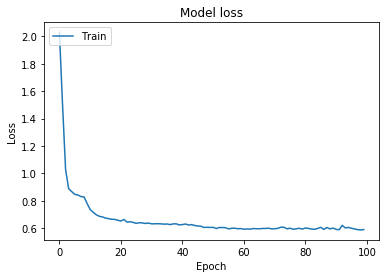

In [16]:
# Plot the loss-MSE value
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.